# __Exploratory Data Analysis – Grammys__

### Importing Libraries and Configuring the Root Path

In this section, the necessary libraries for analysis are imported, and the root path for the notebook is configured. This ensures that required modules and files are accessible during code execution.



In [2]:
import sys
import os


root_path = os.path.abspath(os.path.join('..'))
if root_path not in sys.path:
    sys.path.append(root_path)

In [3]:
print("Current directory before change:", os.getcwd())

try:
    
    os.chdir("../")
    print("Current directory after change:", os.getcwd())

except FileNotFoundError:
    print("""
        FileNotFoundError - The specified directory does not exist or you are already in the root.
        If the code already worked once, do not run it again.
    """)

Current directory before change: /home/jacobo/workshop_02/notebooks
Current directory after change: /home/jacobo/workshop_02


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.database.conecction import create_engine_connection

engine = create_engine_connection()

In [5]:
# Leer el archivo CSV
csv_path = os.path.join(root_path, 'data', 'the_grammy_awards.csv')
grammys_csv = pd.read_csv(csv_path)

# Migrar los datos a la base de datos
grammys_csv.to_sql('grammys', con=engine, if_exists='replace', index=False)

print("Table 'grammys' created and data successfully migrated.")

Table 'grammys' created and data successfully migrated.


In [6]:
query = "SELECT * FROM grammys;" 
grammys_df = pd.read_sql(query, con=engine)

grammys_df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


In [7]:
d = grammys_df.columns.nunique()
grammys_df.columns
print(f"El número de columnas es: {d}")
print(f"El número de filas es: {len(grammys_df)}")

El número de columnas es: 10
El número de filas es: 4810


### Exploring Column Names in the Grammys DataFrame

The `grammys_df.columns` attribute provides a list of all column names in the dataset. This is useful for understanding the structure of the DataFrame and identifying the available fields for analysis.


In [8]:
grammys_df.columns

Index(['year', 'title', 'published_at', 'updated_at', 'category', 'nominee',
       'artist', 'workers', 'img', 'winner'],
      dtype='object')

### Dataset Overview: Grammys DataFrame

The `grammys_df.info()` method provides a summary of the dataset, including entries, columns, non-null counts, and data types. This helps understand the data structure and completeness.

In [9]:
grammys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


### Statistical Summary of the `year` Column

The `grammys_df.describe()` method provides key statistical insights into the `year` column. It shows that the dataset spans from 1958 to 2019, with a mean year of approximately 1996. The standard deviation of 17.15 indicates moderate variability, and the quartiles (25%, 50%, 75%) highlight the distribution of award years across the dataset.


In [10]:
grammys_df.describe()

,year
count,4810.000000
mean,1995.566944
std,17.149720
min,1958.000000
25%,1983.000000
50%,1998.000000
75%,2010.000000
max,2019.000000


### Missing Values Summary

The output provides a summary of missing values in the `grammys_df` DataFrame. Key observations include:

- Columns like `year`, `title`, `published_at`, `updated_at`, `category`, and `winner` have no missing values.
- The `nominee` column has 6 missing entries.
- Significant missing values are observed in `artist` (1840), `workers` (2190), and `img` (1367) columns, indicating incomplete data in these fields.


In [11]:
grammys_df.isnull().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

### Nominee Distribution in the Grammys DataFrame

In [23]:
grammys_df['nominee'].value_counts()

nominee
Bridge Over Troubled Water    7
Berlioz: Requiem              7
Robert Woods                  7
Steven Epstein                7
David Frost                   6
                             ..
This Love                     1
Feel Good Inc.                1
At This Time                  1
Breakaway                     1
Virtuoso                      1
Name: count, Length: 4131, dtype: int64

### Category Distribution in the Grammys DataFrame

The `value_counts()` method is used to analyze the distribution of values in the `category` column. This provides insights into the frequency of each category, helping to identify the most and least common award categories in the dataset.


In [12]:
grammys_df['category'].value_counts()

category
Song Of The Year                                                   70
Record Of The Year                                                 69
Album Of The Year                                                  66
Best Opera Recording                                               64
Best Album Notes                                                   63
                                                                   ..
Best Contemporary Vocal Performance By A Duo, Group Or Chorus       1
Best R&B Performance By A Duo Or Group, Vocal Or Instrumental       1
Best Sacred Performance (Musical)                                   1
Best Jazz Performance - Small Group Or Soloist With Small Group     1
Best Classical Performance - Operatic Or Choral                     1
Name: count, Length: 638, dtype: int64

### Analysis of `year` Column Distribution

The chart highlights the following:

1. **Gradual Increase**: A steady rise in records from 1960 to 2010, possibly due to more categories or nominations.
2. **2020 Peak**: A notable spike in 2020, potentially linked to data recording changes or additional categories.
3. **Overall Trend**: More recent years have higher data density compared to earlier years.
4. **KDE Curve**: Smooths the distribution, emphasizing general trends and reducing noise.


In [14]:
winner_counts = grammys_df['winner'].value_counts()
print(winner_counts)

winner
True    4810
Name: count, dtype: int64



### Missing Values Visualization

This bar chart highlights the number of missing values for each column in the `grammys_df` DataFrame. It provides a clear overview of data completeness, helping to identify columns with significant missing entries for further analysis or cleaning.


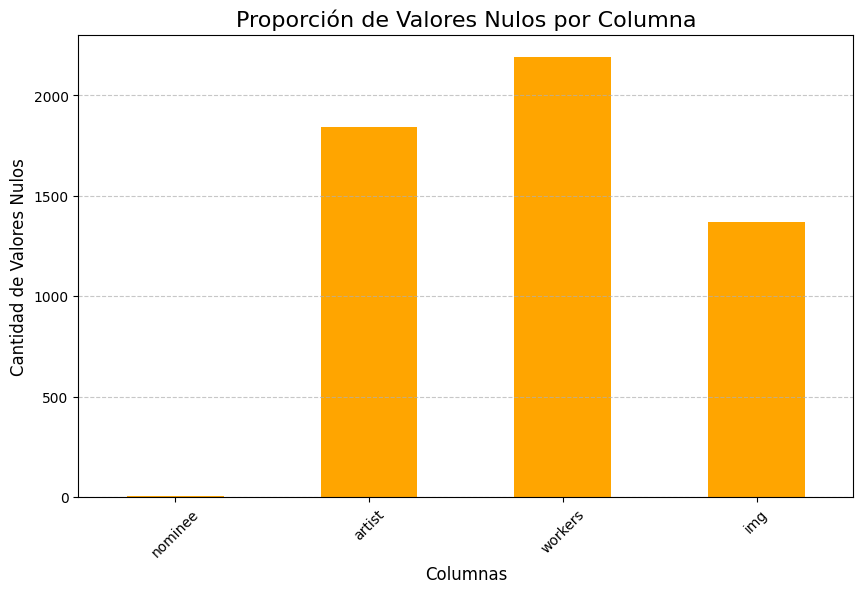

In [17]:
missing_values = grammys_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='orange')
plt.title('Proporción de Valores Nulos por Columna', fontsize=16)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Valores Nulos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Summary of Variables with Images
- **img_counts**: 3443 records have associated images, while 1367 do not.
- **missing_values**: The `img` column has 1367 missing entries, highlighting incomplete data in this field.


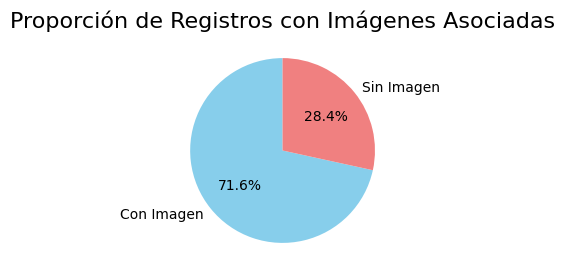

In [21]:
img_counts = grammys_df['img'].notnull().value_counts()

plt.figure(figsize=(3, 3))
plt.pie(img_counts, labels=['Con Imagen', 'Sin Imagen'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Proporción de Registros con Imágenes Asociadas', fontsize=16)
plt.show()

### Distribution of the `year` Column

The histogram shows:

1. **Growth**: Increase in records from the 1960s to 2010s.
2. **2020 Spike**: Significant peak, likely due to data changes.
3. **KDE Curve**: Highlights trends, reduces noise.
4. **Insight**: Higher density in recent years.


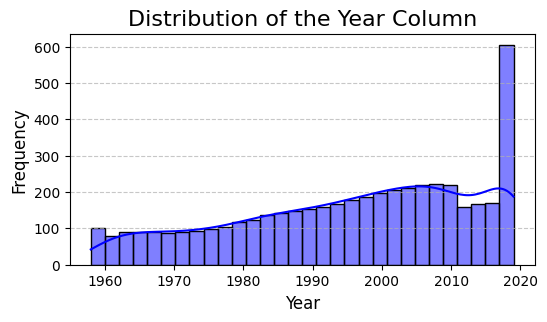

In [13]:
plt.figure(figsize=(6, 3))
sns.histplot(grammys_df['year'], bins=30, kde=True, color='blue')
plt.title('Distribution of the Year Column', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()  


### Top 10 Artists with Most Nominations

This bar chart displays the top 10 artists with the highest number of Grammy nominations, highlighting their prominence in the awards history.


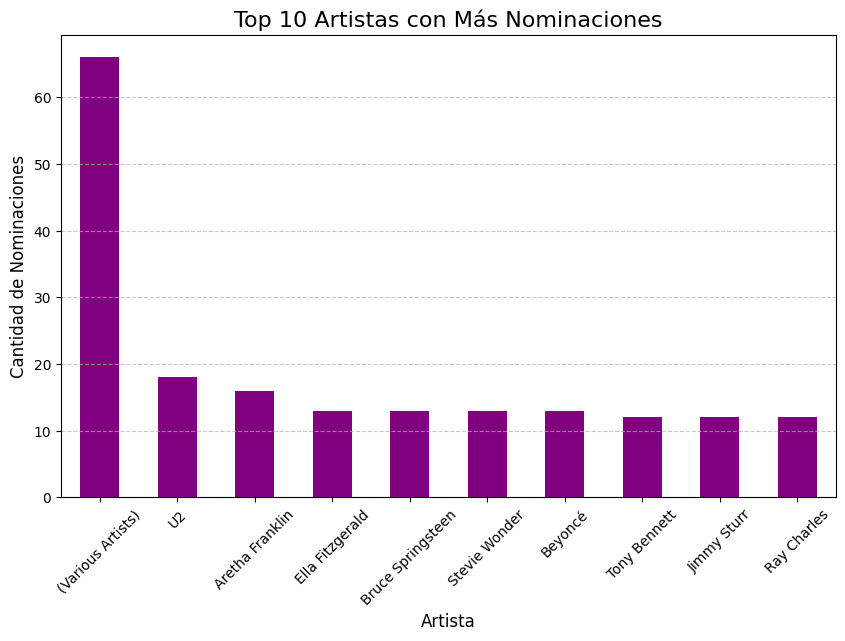

In [19]:
top_artists = grammys_df['artist'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='purple')
plt.title('Top 10 Artistas con Más Nominaciones', fontsize=16)
plt.xlabel('Artista', fontsize=12)
plt.ylabel('Cantidad de Nominaciones', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()